In [1]:
import tf_deepRL as drl
from tf_deepRL.env import load_env
from tf_deepRL.agents.policy_gradient import VPG
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
import gym

env = gym.make("BipedalWalker-v3")

/home/shashi/anaconda3/envs/tf-easyRL/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [6]:
env.action_space

Box(4,)

In [3]:
env = load_env(provider="OpenAI-gym", name="BipedalWalker-v3", virtual_display=True)

AttributeError: 'Box' object has no attribute 'n'

In [3]:
env.action_space

2

In [4]:
def cartpole_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(env.action_space, activation=None)
    ])
    return model

model = cartpole_model()

In [5]:
agent = VPG(model, env)

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
history = agent.train(opt, episodes=700, status_type="text", status_interval=100)

Episode: 100/700
[===========================] - 0s 155ms/episode - rewards: 23.11
Episode: 200/700
[===========================] - 0s 164ms/episode - rewards: 25.63
Episode: 300/700
[===========================] - 0s 246ms/episode - rewards: 38.85
Episode: 400/700
[===========================] - 0s 403ms/episode - rewards: 74.32
Episode: 500/700
[===========================] - 0s 916ms/episode - rewards: 199.49
Episode: 535/700
[=========                  ] - 1s 173ms/episode - rewards: 169.0


KeyboardInterrupt: 

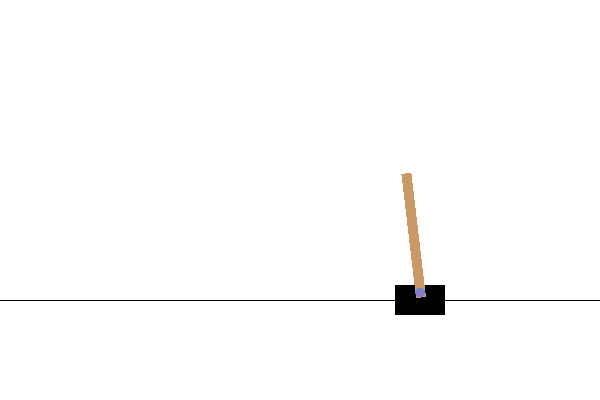

True

In [9]:
agent.play(max_steps=200, stop_when_finish=False)